## libs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Definição do problema

## Data collection

### Import

In [2]:
df_embarque = pd.read_csv("../data/dados_treino.csv")

In [3]:
df_embarque.head()

,cod_treino_predicao_pedidos_embarques,dt_data_de_embarque,dt_data_pcp,dt_data_de_entrega,dt_data_acordada,dt_data_do_faturamento,des_situacao_da_entrega,des_situacao_do_pedido,des_linha,des_pedido_terceiro,...,num_volume_embarcado,num_limite_minimo_embarque,num_limite_maximo_embarque,dt_data_de_cancelamento,des_motivo_de_cancelamento,cod_incluido_por,dt_inclusao,cod_alterado_por,dt_alteracao,num_qtde
0,151,31/01/2023,19/01/2023,03/02/2023,20/01/2023,20/01/2023,Faturada,Faturado,CAJAMAR TUBETE,NaN,...,250.0,0.0,90.0,NaN,NaN,2382,20/11/2023 14:03:36,NaN,NaN,250.0
1,152,29/01/2023,29/01/2023,30/01/2023,30/01/2023,30/01/2023,Faturada,Faturado,CAJAMAR MOÍDA ATM,NaN,...,15.0,0.0,3.0,NaN,NaN,2382,20/11/2023 14:03:36,NaN,NaN,15.0
2,153,29/01/2023,29/01/2023,30/01/2023,30/01/2023,30/01/2023,Faturada,Faturado,CAJ CORTES TERMOF,NaN,...,1.0,0.0,5.0,NaN,NaN,2382,20/11/2023 14:03:36,NaN,NaN,14.0
3,154,29/01/2023,29/01/2023,30/01/2023,30/01/2023,30/01/2023,Faturada,Faturado,CAJ CORTES TERMOF,NaN,...,0.0,0.0,5.0,NaN,NaN,2382,20/11/2023 14:03:36,NaN,NaN,14.0
4,155,29/01/2023,29/01/2023,30/01/2023,30/01/2023,30/01/2023,Faturada,Faturado,CAJ CORTES TERMOF,NaN,...,1.0,0.0,5.0,NaN,NaN,2382,20/11/2023 14:03:36,NaN,NaN,15.0


In [4]:
df_embarque.tail()

,cod_treino_predicao_pedidos_embarques,dt_data_de_embarque,dt_data_pcp,dt_data_de_entrega,dt_data_acordada,dt_data_do_faturamento,des_situacao_da_entrega,des_situacao_do_pedido,des_linha,des_pedido_terceiro,...,num_volume_embarcado,num_limite_minimo_embarque,num_limite_maximo_embarque,dt_data_de_cancelamento,des_motivo_de_cancelamento,cod_incluido_por,dt_inclusao,cod_alterado_por,dt_alteracao,num_qtde
53790,53941,20/12/2023,20/12/2023,22/12/2023,03/01/2024,20/12/2023,Faturada,Faturado,CAJAMAR TUBETE,NaN,...,1512.0,0.0,30.0,NaN,NaN,2382,23/01/2024 09:54:07,NaN,NaN,1512.0
53791,53942,13/01/2024,12/01/2024,15/01/2024,14/01/2024,13/01/2024,Faturada,Faturado,CAJAMAR TUBETE,NaN,...,1512.0,0.0,90.0,NaN,NaN,2382,23/01/2024 09:54:07,NaN,NaN,1512.0
53792,53943,19/01/2024,NaN,02/02/2024,NaN,NaN,Pendente,Liberado,CAJAMAR - MP,54450908,...,0.0,1.0,20.0,NaN,NaN,2382,23/01/2024 09:54:07,NaN,NaN,29000.0
53793,53944,09/01/2024,09/01/2024,11/01/2024,11/01/2024,09/01/2024,Faturada,Faturado,CAJAMAR TUBETE,NaN,...,1512.0,0.0,90.0,NaN,NaN,2382,23/01/2024 09:54:07,NaN,NaN,1555.0
53794,53945,05/12/2023,NaN,11/12/2023,NaN,11/12/2023,Faturada,Faturado,CAJAMAR - MP,53926271,...,41.0,1.0,20.0,NaN,NaN,2382,23/01/2024 09:54:07,NaN,NaN,30000.0


In [5]:
df_embarque.describe()

,cod_treino_predicao_pedidos_embarques,cod_terceiro_centralizador,cod_codigo_terceiro,cod_pedido,cod_codigo_instrucao_filial,cod_produto,num_peso_liquido_estimado,num_peso_bruto_estimado,num_volume_estimado,num_peso_embarcado,num_volume_embarcado,num_limite_minimo_embarque,num_limite_maximo_embarque,dt_data_de_cancelamento,des_motivo_de_cancelamento,cod_incluido_por,cod_alterado_por,dt_alteracao,num_qtde
count,53795.000000,5.379500e+04,5.379500e+04,5.379500e+04,53795.000000,53795.000000,53795.00000,53795.000000,53795.000000,53795.000000,53795.000000,53795.000000,53795.000000,0.0,0.0,53795.0,0.0,0.0,53795.000000
mean,27048.000000,4.577914e+05,1.800792e+06,5.202626e+07,130230.807993,377573.451324,358.62297,358.935101,27.593474,292.702731,19.338396,0.093206,15.758881,NaN,NaN,2382.0,NaN,NaN,148.966895
std,15529.423202,7.283846e+05,1.242241e+06,1.446246e+06,49827.353155,25067.442062,1976.92241,1979.060098,233.179066,1742.966888,91.409640,0.539041,29.938785,NaN,NaN,0.0,NaN,NaN,1220.426527
min,151.000000,1.470000e+02,1.010000e+02,4.930505e+07,0.000000,25.000000,1.00000,1.000000,0.001000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,2382.0,NaN,NaN,1.000000
25%,13599.500000,1.042000e+03,2.205610e+05,5.076114e+07,138531.000000,375622.000000,15.00000,15.000000,2.000000,13.130000,1.000000,0.000000,3.000000,NaN,NaN,2382.0,NaN,NaN,6.000000
50%,27048.000000,1.072700e+04,2.187588e+06,5.198153e+07,146957.000000,378979.000000,36.00000,36.000000,5.000000,25.985000,3.000000,0.000000,4.000000,NaN,NaN,2382.0,NaN,NaN,14.000000
75%,40496.500000,1.416307e+06,2.699191e+06,5.324624e+07,155111.000000,383733.000000,90.00000,90.000000,12.220000,78.000000,10.000000,0.000000,8.000000,NaN,NaN,2382.0,NaN,NaN,17.000000
max,53945.000000,3.710073e+06,3.885295e+06,5.459677e+07,162126.000000,392072.000000,30000.00000,30000.000000,10000.000000,29735.490000,1512.000000,33.000000,500.000000,NaN,NaN,2382.0,NaN,NaN,30000.000000


In [6]:
df_embarque.dtypes

cod_treino_predicao_pedidos_embarques      int64
dt_data_de_embarque                       object
dt_data_pcp                               object
dt_data_de_entrega                        object
dt_data_acordada                          object
dt_data_do_faturamento                    object
des_situacao_da_entrega                   object
des_situacao_do_pedido                    object
des_linha                                 object
des_pedido_terceiro                       object
cod_terceiro_centralizador                 int64
des_nome_do_terceiro_centralizador        object
cod_codigo_terceiro                        int64
des_nome_do_terceiro                      object
des_cidade                                object
des_uf                                    object
cod_pedido                                 int64
dt_data_emissao_pedido                    object
des_hora_emissao_pedido                   object
des_usuario_digitador                     object
des_usuario_responsa

### Collecting the necessary characteristics

In [7]:
columns = [
    'num_qtde', 'dt_data_emissao_pedido', 'cod_pedido', 'des_uf', 
    'des_cidade', 'des_nome_do_terceiro', 
    'des_nome_do_terceiro_centralizador', 'dt_data_do_faturamento', 
    'dt_data_pcp', 'dt_data_de_embarque'
]

df_embarques2 = df_embarque[columns].copy()
df_embarques2.dtypes

num_qtde                              float64
dt_data_emissao_pedido                 object
cod_pedido                              int64
des_uf                                 object
des_cidade                             object
des_nome_do_terceiro                   object
des_nome_do_terceiro_centralizador     object
dt_data_do_faturamento                 object
dt_data_pcp                            object
dt_data_de_embarque                    object
dtype: object

### Typing

In [8]:
df_embarques2['num_qtde'] = df_embarques2['num_qtde'].astype(float)
df_embarques2['cod_pedido'] = df_embarques2['cod_pedido'].astype('category')
df_embarques2['des_uf'] = df_embarques2['des_uf'].astype('category')
df_embarques2['des_cidade'] = df_embarques2['des_cidade'].astype('category')
df_embarques2['des_nome_do_terceiro'] = df_embarques2['des_nome_do_terceiro'].astype('category')
df_embarques2['des_nome_do_terceiro_centralizador'] = df_embarques2['des_nome_do_terceiro_centralizador'].astype('category')
df_embarques2['dt_data_do_faturamento'] = pd.to_datetime(df_embarques2['dt_data_do_faturamento'], format='%d/%m/%Y', errors='coerce')
df_embarques2['dt_data_pcp'] = pd.to_datetime(df_embarques2['dt_data_pcp'], format='%d/%m/%Y', errors='coerce')
df_embarques2['dt_data_de_embarque'] = pd.to_datetime(df_embarques2['dt_data_de_embarque'], format='%d/%m/%Y', errors='coerce')
df_embarques2['dt_data_emissao_pedido'] = pd.to_datetime(df_embarques2['dt_data_emissao_pedido'], format='%d/%m/%Y', errors='coerce')

print(df_embarques2.dtypes)

num_qtde                                     float64
dt_data_emissao_pedido                datetime64[ns]
cod_pedido                                  category
des_uf                                      category
des_cidade                                  category
des_nome_do_terceiro                        category
des_nome_do_terceiro_centralizador          category
dt_data_do_faturamento                datetime64[ns]
dt_data_pcp                           datetime64[ns]
dt_data_de_embarque                   datetime64[ns]
dtype: object


### Grouping

In [9]:
df_agregado = df_embarques2.groupby('cod_pedido', observed=True).agg({
    'num_qtde': 'sum',  # Soma os valores de 'num_qtde'
    'dt_data_emissao_pedido': 'first',  # Mantém o primeiro valor registrado
    'des_uf': 'first',  # Mantém o primeiro valor registrado
    'des_cidade': 'first',  # Mantém o primeiro valor registrado
    'des_nome_do_terceiro': 'first',  # Mantém o primeiro valor registrado
    'des_nome_do_terceiro_centralizador': 'first',  # Mantém o primeiro valor registrado
    'dt_data_do_faturamento': 'first',  # Mantém o primeiro valor registrado
    'dt_data_pcp': 'first',  # Mantém o primeiro valor registrado
    'dt_data_de_embarque': 'first'  # Mantém o primeiro valor registrado
}).reset_index()

## Exploratory data analysis 

### Summary statistics of data

In [10]:
df_agregado.describe()

,num_qtde,dt_data_emissao_pedido,dt_data_do_faturamento,dt_data_pcp,dt_data_de_embarque
count,21642.000000,21642,18474,21044,21642
mean,370.283436,2023-07-07 06:34:02.029387264,2023-07-22 12:28:31.724585984,2023-07-09 06:41:03.409998080,2023-07-11 22:49:16.251732736
min,1.000000,2022-12-08 00:00:00,2023-01-02 00:00:00,2023-01-01 00:00:00,2023-01-01 00:00:00
25%,10.000000,2023-04-06 00:00:00,2023-04-24 00:00:00,2023-04-11 00:00:00,2023-04-12 00:00:00
50%,20.000000,2023-07-10 00:00:00,2023-08-01 00:00:00,2023-07-10 00:00:00,2023-07-13 00:00:00
75%,55.000000,2023-10-03 00:00:00,2023-10-20 00:00:00,2023-10-04 00:00:00,2023-10-08 00:00:00
max,39833.000000,2024-01-19 00:00:00,2024-01-23 00:00:00,2024-01-19 00:00:00,2024-01-20 00:00:00
std,2309.076762,NaN,NaN,NaN,NaN


In [11]:
print(df_agregado['des_cidade'].value_counts())
print(df_agregado['des_cidade'].unique())

des_cidade
SAO PAULO                 4776
RIO DE JANEIRO            1407
CAMPINAS                   598
SAO BERNARDO DO CAMPO      593
MOGI DAS CRUZES            569
                          ... 
BARREIRAS                    1
SORRISO                      1
MAIRIPORA                    1
SANTO ANTONIO DE POSSE       1
MAGE                         1
Name: count, Length: 227, dtype: int64
['RIO DE JANEIRO', 'MARINGA', 'PONTA GROSSA', 'LONDRINA', 'CASCAVEL', ..., 'TEIXEIRA DE FREITAS', 'IRECE', 'ALAGOINHAS', 'BARREIRAS', 'SANTO ANTONIO DE JESUS']
Length: 227
Categories (227, object): ['AGUA BOA', 'ALAGOINHAS', 'ALTA FLORESTA', 'AMERICANA', ..., 'VINHEDO', 'VITORIA', 'VITORIA DA CONQUISTA', 'VOLTA REDONDA']


In [12]:
print(df_agregado['des_nome_do_terceiro'].value_counts())
print(df_agregado['des_nome_do_terceiro'].unique())

des_nome_do_terceiro
SENDAS DISTRIBUIDORA SA            3155
ATACADAO S A                       3070
SENDAS DISTRIBUIDORA S A           2245
ASSAI ATACADISTA                   1753
SUPERMERCADOS CAVICCHIOLLI LTDA     583
                                   ... 
IRMAOS MUFFATO SA                     1
JBS S A - DMG                         1
OXAN ATACADISTA LTDA                  1
SUPER MUFFATO                         1
XANCARNES                             1
Name: count, Length: 358, dtype: int64
['TORRE E CIA SUPERMERCADOS SA', 'ATACADAO S A', 'JBS S A - DDF', 'JBS S/A - GYN', 'CASAS GUANABARA COMESTIVEIS LTDA', ..., 'JBS S/A - TCM', 'FV DISTRIBUIDORA DE CARNES E PESCADOS EIRELI', 'SUPERMERCADOS JOANIN', 'ATACADO S A', 'MAXXI']
Length: 358
Categories (358, object): ['5M COM ATACADISTA E VAREJISTA DE ALIMENTOS LTDA', '5M COMERC ATACADISTA E VAREJISTA DE ALIMENTOS..., '5M COMERCIO ATACADISTA E VAREJI DE ALIMENTOS ..., '5M COMERCIO ATACADISTA E VAREJISTA DE ALIMENT..., ..., 'WMB SUPERMERCA

In [13]:
print(df_agregado['des_nome_do_terceiro_centralizador'].value_counts())
print(df_agregado['des_nome_do_terceiro_centralizador'].unique())

des_nome_do_terceiro_centralizador
SENDAS DISTRIBUIDORA SA             7207
GRUPO CARREFOUR BRASIL              1799
ATACADAO S.A.                       1569
JBS S/A - AND                       1383
SUPERMERCADOS CAVICCHIOLLI LTDA      731
                                    ... 
SUPERMERCADO COLINA SUL LTDA EPP       1
SUPERMERCADO DA GENTE                  1
SUPERMERCADO DO FRADE LTDA             1
SUPERMERCADO HIROTA LTDA               1
XANCARNES                              1
Name: count, Length: 222, dtype: int64
['TORRE E CIA SUPERMERCADOS SA', 'GRUPO CARREFOUR BRASIL', 'JBS S/A - AND', 'CASAS GUANABARA COMESTIVEIS LTDA', 'SENDAS DISTRIBUIDORA SA', ..., 'COSTAZUL ALIMENTOS EIRELI', 'GIGANTE ATACADISTA', 'SUPERMERCADO NORDESTAO LTDA', 'COOP COOPERATIVA DE CONSUMO', 'FV DISTRIBUIDORA DE CARNES E PESCADOS EIRELI']
Length: 222
Categories (222, object): ['5M COM ATACADISTA E VAREJISTA DE ALIMENTOS LTDA', '707 AUTO SERVICO DE ALIMENTOS LTDA', 'ADONAI ATACADISTA LTDA', 'ALDEIA DA SERRA

In [14]:
print(df_agregado['des_uf'].value_counts())
print(df_agregado['des_uf'].unique())

des_uf
SP    17565
RJ     2227
DF      542
PR      524
GO      205
MS      100
RO       96
MT       88
MG       84
RS       67
BA       60
PA       30
TO       19
ES       15
SE       10
AC        5
SC        3
RN        1
CE        1
Name: count, dtype: int64
['RJ', 'PR', 'DF', 'GO', 'SP', ..., 'RO', 'PA', 'CE', 'AC', 'RN']
Length: 19
Categories (19, object): ['AC', 'BA', 'CE', 'DF', ..., 'SC', 'SE', 'SP', 'TO']


##### **Análise Detalhada:**

*Discrepância entre Média e Mediana de Pedidos*

**Observação:** A média de pedidos é 370, significativamente maior que a mediana de 20.
**Implicação:** Isso indica uma distribuição de pedidos altamente assimétrica, com alguns pedidos extremamente grandes distorcendo a média.

*Intervalos de Tempo entre Etapas do Processo*

**Emissão para Faturamento:** O tempo médio é de cerca de 15 dias.
**Implicação:** Possíveis atrasos ou necessidade de tempo de preparação.
**Emissão para Embarque:** O tempo médio é de aproximadamente 4 dias.
**Implicação:** Indica uma operação logística eficiente.

*Concentração Geográfica de Pedidos*

**Cidades Principais:** São Paulo (4776 pedidos) e Rio de Janeiro (1407 pedidos).
**Implicação:** Alto volume de operações nessas áreas.
**Distribuição Estadual:** SP com 17.565 pedidos domina claramente.
**Implicação:** Concentração da atividade comercial e logística.

*Variação nas Categorias de Terceiros*

**Clientes Principais:** 'SENDAS DISTRIBUIDORA SA' e 'ATACADAO S.A.' são frequentemente mencionados.
**Implicação:** Indica clientes chave e também sugere inconsistências nos registros de dados.

##### **Passos a Seguir:**

*Análise de Outliers*

**Ação:** Investigar pedidos de grande volume para entender suas características e impactos.

*Uniformização de Dados*

**Ação:** Corrigir inconsistências nos registros de dados para análises precisas.

### Univariate data visualization

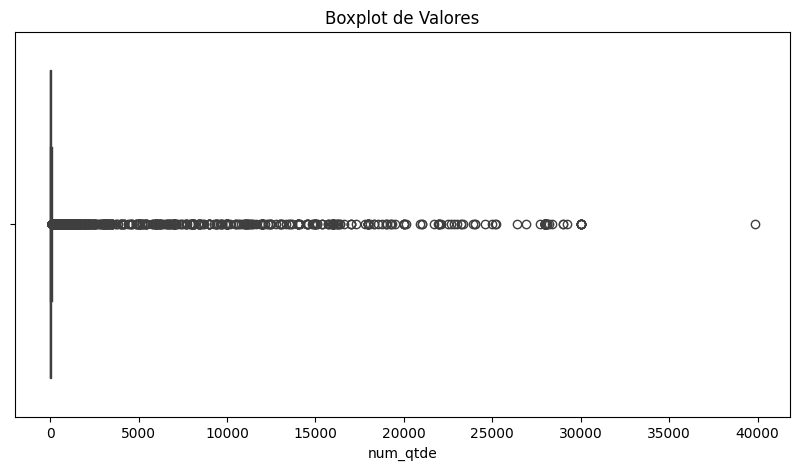

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_agregado['num_qtde'])
plt.title('Boxplot de Valores')
plt.show()

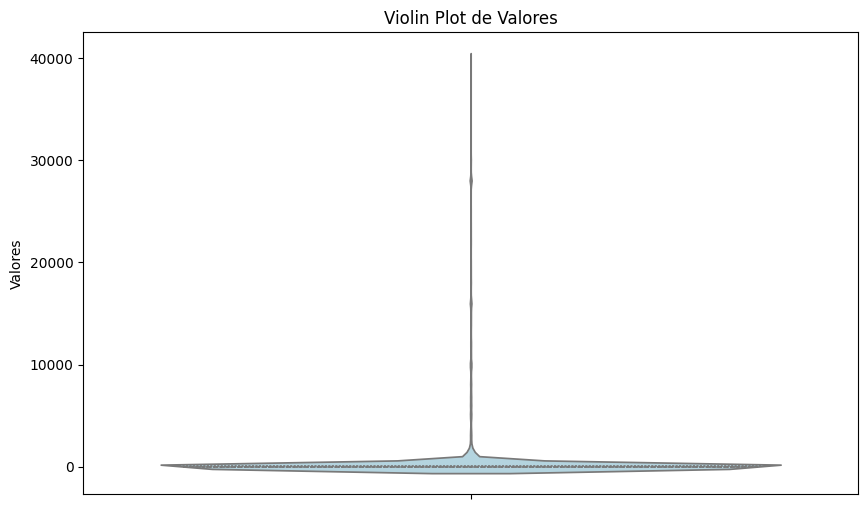

In [16]:
# Criando o violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_agregado['num_qtde'], inner='quartile', color='lightblue')  # 'quartile' para mostrar os quartis dentro do violin

plt.title('Violin Plot de Valores')
plt.ylabel('Valores')

# Mostrando o gráfico
plt.show()

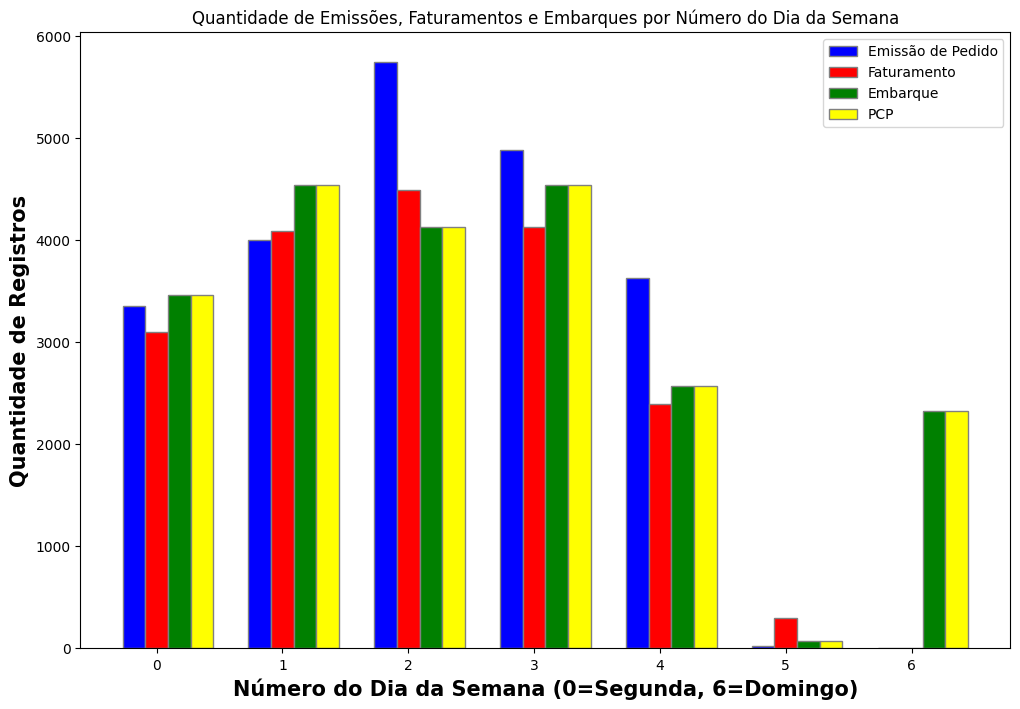

In [17]:
# Adicionar colunas para o número do dia da semana
df_agregado['weekday_emissao'] = df_agregado['dt_data_emissao_pedido'].dt.dayofweek
df_agregado['weekday_faturamento'] = df_agregado['dt_data_do_faturamento'].dt.dayofweek
df_agregado['weekday_embarque'] = df_agregado['dt_data_de_embarque'].dt.dayofweek
df_agregado['weekday_pcp'] = df_agregado['dt_data_pcp'].dt.dayofweek

# Contar ocorrências por número do dia da semana para cada tipo de data
weekday_counts_emissao = df_agregado['weekday_emissao'].value_counts().reindex(range(7), fill_value=0)
weekday_counts_faturamento = df_agregado['weekday_faturamento'].value_counts().reindex(range(7), fill_value=0)
weekday_counts_embarque = df_agregado['weekday_embarque'].value_counts().reindex(range(7), fill_value=0)
weekday_counts_pcp = df_agregado['weekday_pcp'].value_counts().reindex(range(7), fill_value=0)

bar_width = 0.18
group_width = 0.15  # Espaçamento adicional entre grupos

r1 = np.arange(len(weekday_counts_emissao))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.bar(r1, weekday_counts_emissao, color='blue', width=bar_width, edgecolor='grey', label='Emissão de Pedido')
plt.bar(r2, weekday_counts_faturamento, color='red', width=bar_width, edgecolor='grey', label='Faturamento')
plt.bar(r3, weekday_counts_embarque, color='green', width=bar_width, edgecolor='grey', label='Embarque')
plt.bar(r4, weekday_counts_embarque, color='yellow', width=bar_width, edgecolor='grey', label='PCP')

# Adicionando legendas e rótulos
plt.xlabel('Número do Dia da Semana (0=Segunda, 6=Domingo)', fontweight='bold', fontsize=15)
plt.ylabel('Quantidade de Registros', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width for r in range(len(weekday_counts_emissao))], ['0', '1', '2', '3', '4', '5', '6'])
plt.title('Quantidade de Emissões, Faturamentos e Embarques por Número do Dia da Semana')

plt.legend()
plt.show()

1-Forte correlação entre 'Embarque' e 'PCP' uma delas pode ser excluída
2-Volume de embarque previsto está quase todo em pequeno volumes de 1 a 60

In [18]:
df_limpo = df_agregado.dropna()

In [19]:
df_limpo.describe()

,num_qtde,dt_data_emissao_pedido,dt_data_do_faturamento,dt_data_pcp,dt_data_de_embarque,weekday_emissao,weekday_faturamento,weekday_embarque,weekday_pcp
count,17990.000000,17990,17990,17990,17990,17990.000000,17990.000000,17990.000000,17990.000000
mean,91.435330,2023-07-14 05:16:05.736520192,2023-07-19 18:13:43.657587456,2023-07-19 00:46:15.942190336,2023-07-19 00:48:06.403557632,2.100834,1.962257,2.141579,2.138744
min,1.000000,2022-12-08 00:00:00,2023-01-02 00:00:00,2023-01-01 00:00:00,2023-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,10.000000,2023-04-13 00:00:00,2023-04-19 00:00:00,2023-04-19 00:00:00,2023-04-19 00:00:00,1.000000,1.000000,1.000000,1.000000
50%,20.000000,2023-07-24 00:00:00,2023-07-26 00:00:00,2023-07-26 00:00:00,2023-07-26 00:00:00,2.000000,2.000000,2.000000,2.000000
75%,54.000000,2023-10-10 00:00:00,2023-10-18 00:00:00,2023-10-17 00:00:00,2023-10-17 00:00:00,3.000000,3.000000,3.000000,3.000000
max,39833.000000,2024-01-18 00:00:00,2024-01-20 00:00:00,2024-01-19 00:00:00,2024-01-19 00:00:00,6.000000,5.000000,6.000000,6.000000
std,653.177002,NaN,NaN,NaN,NaN,1.339752,1.325408,1.832596,1.834586


In [20]:
df_final = df_limpo.drop(columns=['cod_pedido', 'dt_data_do_faturamento', 'dt_data_pcp'])

df_final['int_mes_embarque'] = df_final['dt_data_de_embarque'].dt.month
df_final['int_dia_semana_embarque'] = df_final['dt_data_de_embarque'].dt.dayofweek

df_final['int_mes_emissao'] = df_final['dt_data_emissao_pedido'].dt.month
df_final['int_dia_semana_emissao'] = df_final['dt_data_emissao_pedido'].dt.dayofweek

df_final['int_diferenca_embarque_emissao'] = df_final['dt_data_de_embarque'] - df_final['dt_data_emissao_pedido']

In [21]:
df = df_final.drop(columns=['dt_data_emissao_pedido', 'dt_data_de_embarque'])



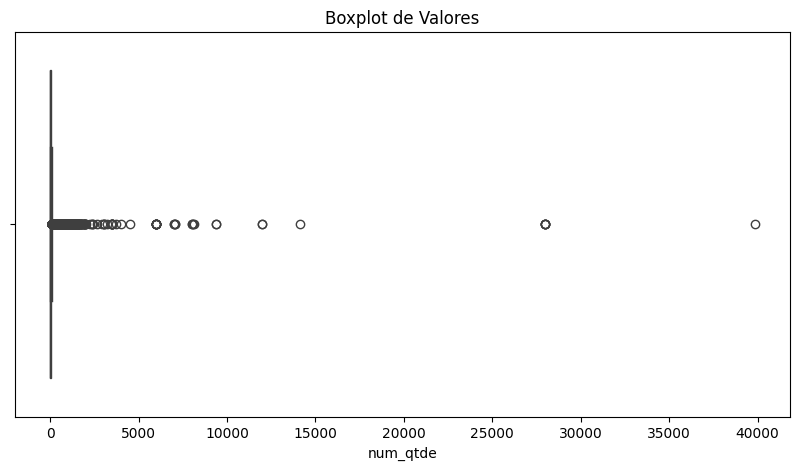

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['num_qtde'])
plt.title('Boxplot de Valores')
plt.show()

In [23]:
df[df['num_qtde'] >=28000]

,num_qtde,des_uf,des_cidade,des_nome_do_terceiro,des_nome_do_terceiro_centralizador,weekday_emissao,weekday_faturamento,weekday_embarque,weekday_pcp,int_mes_embarque,int_dia_semana_embarque,int_mes_emissao,int_dia_semana_emissao,int_diferenca_embarque_emissao
1275,28000.0,SP,SAO PAULO,JBS SA DSP,JBS S/A - AND,4,3.0,3,3.0,2,3,1,4,20 days
5066,28000.0,SP,SAO PAULO,JBS SA DSP,JBS S/A - AND,0,2.0,1,1.0,4,1,4,0,22 days
7199,28000.0,SP,SAO PAULO,JBS SA DSP,JBS S/A - AND,1,1.0,0,0.0,5,0,5,1,6 days
10094,28000.0,SP,SAO PAULO,JBS SA DSP,JBS S/A - AND,1,3.0,2,2.0,7,2,6,1,8 days
10099,28000.0,SP,SAO PAULO,JBS SA DSP,JBS S/A - AND,1,3.0,2,2.0,7,2,6,1,29 days
13206,39833.0,SP,SAO PAULO,JBS SA DSP,JBS S/A - AND,4,2.0,0,0.0,8,0,8,4,10 days


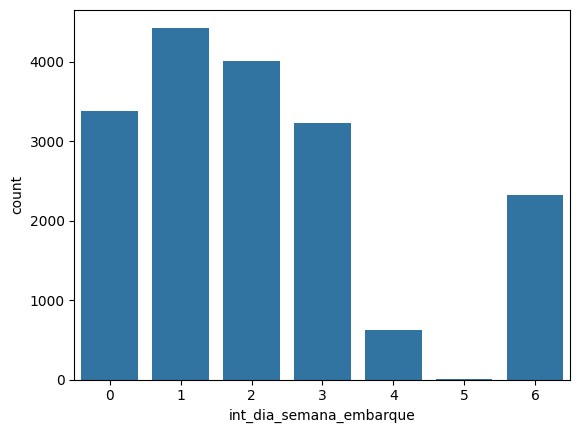

In [24]:
sns.countplot(x=df['int_dia_semana_embarque']);

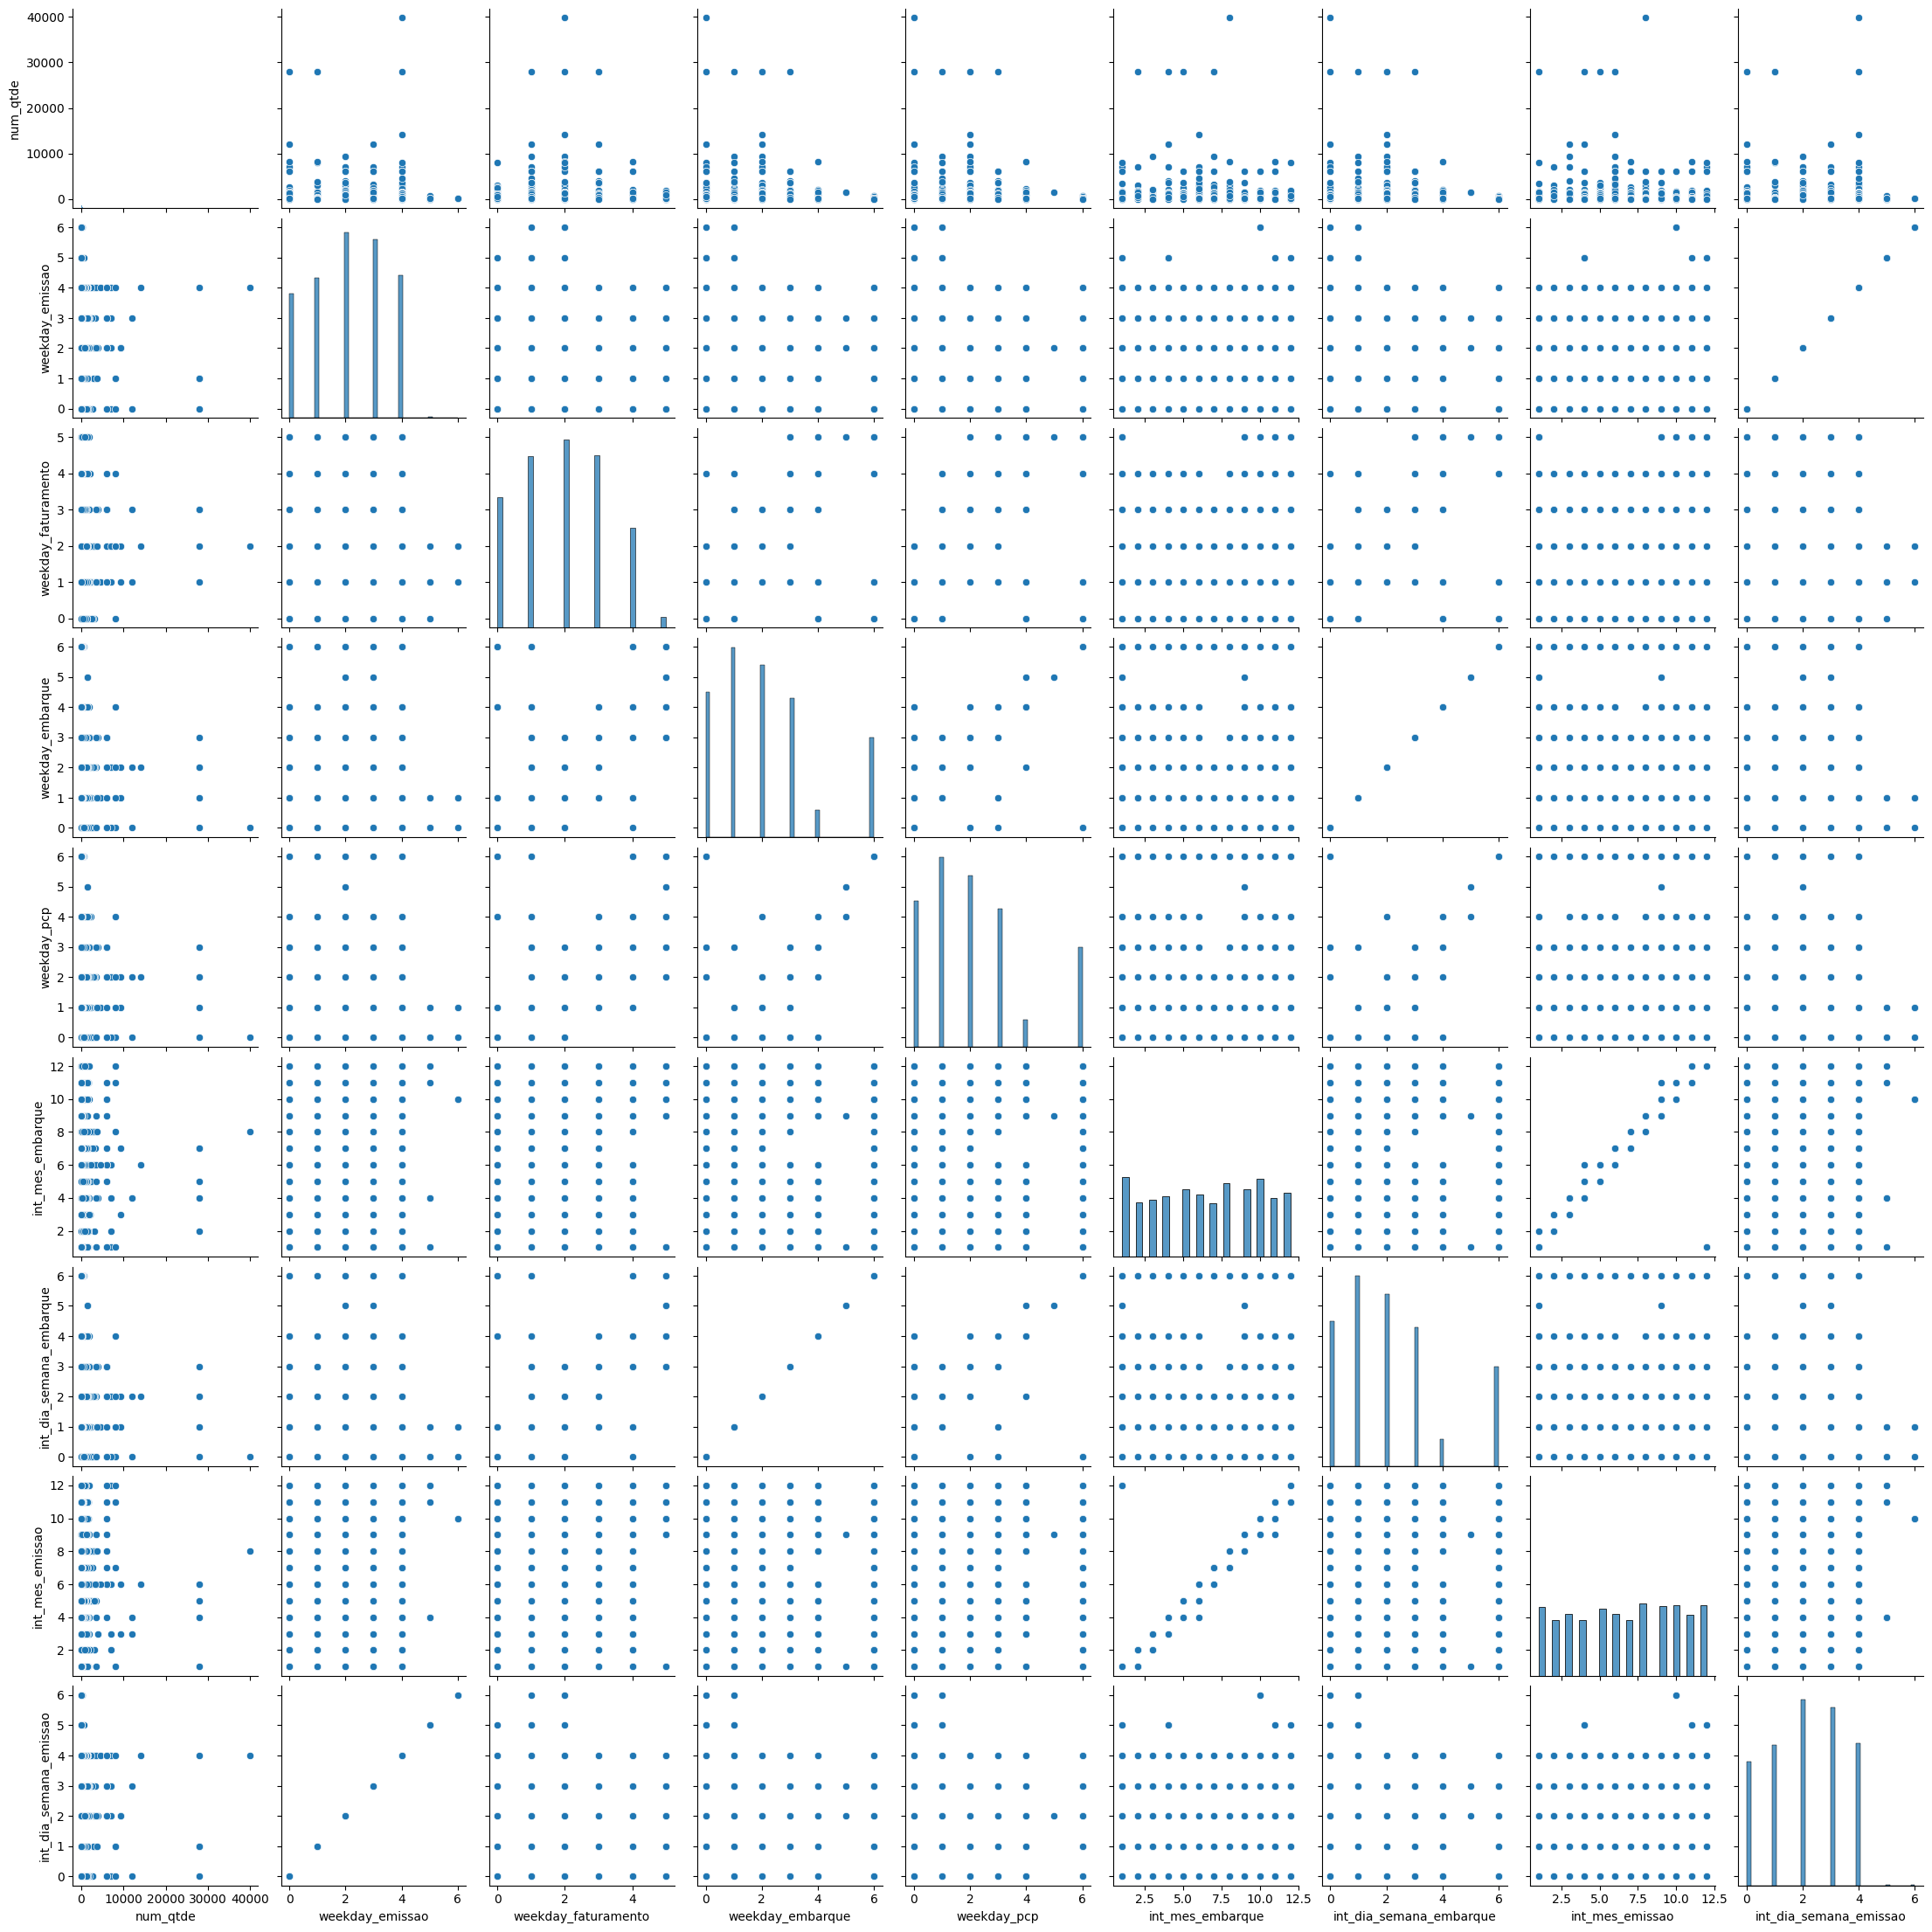

In [25]:
sns.pairplot(df)
plt.show()

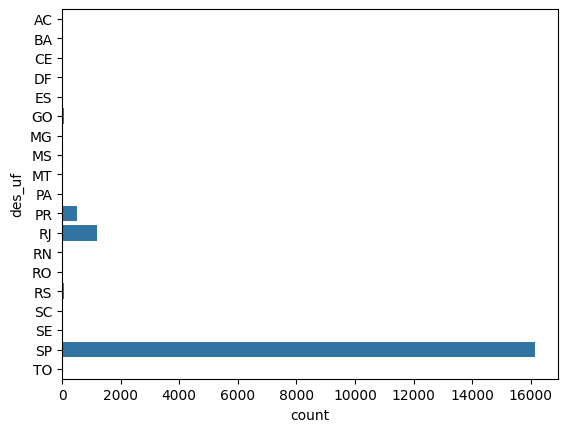

In [26]:
sns.countplot(df['des_uf'])
plt.show()

In [27]:
df['num_qtde'].mean()

91.43533001667592

In [28]:
df['num_qtde'].median()

20.0

In [29]:
q1 = df['num_qtde'].quantile(0.25)
q2 = df['num_qtde'].quantile(0.5)
q3 = df['num_qtde'].quantile(0.75)

print("Primeiro quartil: ", q1)
print("Segundo quartil: ", q2)
print("Terceiro quartil: ", q3)


Primeiro quartil:  10.0
Segundo quartil:  20.0
Terceiro quartil:  54.0


In [30]:
df.describe()

,num_qtde,weekday_emissao,weekday_faturamento,weekday_embarque,weekday_pcp,int_mes_embarque,int_dia_semana_embarque,int_mes_emissao,int_dia_semana_emissao,int_diferenca_embarque_emissao
count,17990.000000,17990.000000,17990.000000,17990.000000,17990.000000,17990.000000,17990.000000,17990.000000,17990.000000,17990
mean,91.435330,2.100834,1.962257,2.141579,2.138744,6.541023,2.141579,6.633797,2.100834,4 days 19:32:00.667037242
std,653.177002,1.339752,1.325408,1.832596,1.834586,3.486314,1.832596,3.476384,1.339752,3 days 04:38:13.694806851
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0 days 00:00:00
25%,10.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,4.000000,1.000000,3 days 00:00:00
50%,20.000000,2.000000,2.000000,2.000000,2.000000,7.000000,2.000000,7.000000,2.000000,5 days 00:00:00
75%,54.000000,3.000000,3.000000,3.000000,3.000000,10.000000,3.000000,10.000000,3.000000,6 days 00:00:00
max,39833.000000,6.000000,5.000000,6.000000,6.000000,12.000000,6.000000,12.000000,6.000000,61 days 00:00:00


In [31]:
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
outliers = df[(df['num_qtde'] < lower_bound) | (df['num_qtde'] > upper_bound)]
print(lower_bound)
print(upper_bound)

#outliers


-56.0
120.0


In [32]:
mask = df['des_nome_do_terceiro'].astype(str) == df['des_nome_do_terceiro_centralizador'].astype(str)

df_correlacao = df[mask]
print(df)
num_iguais = df_correlacao.shape[0]
print(num_iguais)

       num_qtde des_uf              des_cidade          des_nome_do_terceiro  \
0         162.0     RJ          RIO DE JANEIRO  TORRE E CIA SUPERMERCADOS SA   
1          80.0     PR                 MARINGA                  ATACADAO S A   
3          80.0     PR                LONDRINA                  ATACADAO S A   
4          80.0     PR                CASCAVEL                  ATACADAO S A   
5          80.0     PR           FOZ DO IGUACU                  ATACADAO S A   
...         ...    ...                     ...                           ...   
21635      30.0     BA     TEIXEIRA DE FREITAS                      ATACADAO   
21636     100.0     BA                   IRECE                      ATACADAO   
21637      30.0     BA              ALAGOINHAS                      ATACADAO   
21638      30.0     BA               BARREIRAS                      ATACADAO   
21639      40.0     BA  SANTO ANTONIO DE JESUS                      ATACADAO   

           des_nome_do_terceiro_central